# Classifier

1. Logistic regression (https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)


## Import packages

In [9]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [10]:
df = pd.read_pickle("features.pkl")
df.head()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84619 entries, 0 to 84618
Data columns (total 4884 columns):
 #     Column                           Dtype  
---    ------                           -----  
 0     index                            int64  
 1     author                           object 
 2     body_x                           object 
 3     probody                          object 
 4     tokens                           object 
 5     agreeableness                    float64
 6     openness                         float64
 7     conscientiousness                float64
 8     extraversion                     float64
 9     neuroticism                      float64
 10    agree                            int64  
 11    openn                            int64  
 12    consc                            int64  
 13    extra                            int64  
 14    neuro                            int64  
 15    language                         int64  
 16    author_flair_text 

## 1. Logistic regression

In [11]:
# df.columns.values.tolist()
featurelist = df.columns.tolist()
flist = featurelist[35:] #technically we can go from 23, but convergence error
print(len(flist))

4849


In [12]:
#split dataset in features and target variable
feature_cols = flist
x = df[feature_cols] 
y = df.extra # Target variable

In [13]:
# split dataset in training an testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 4295,     6],
       [    1, 16853]])

Text(0.5, 257.44, 'Predicted label')

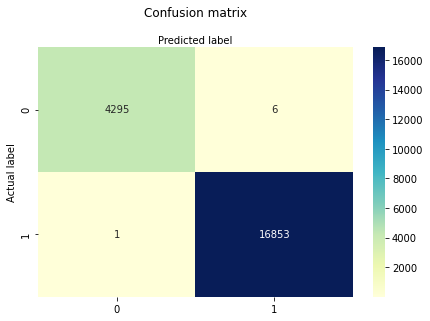

In [15]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9996691089576932
Precision: 0.9996441070051605
Recall: 0.9999406669039991
F1: 0.9997923649630707
